<a href="https://colab.research.google.com/github/andrew-vandy/cs5265-ml-foundations/blob/week-6-assignment/cs5265_asongate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS5265 Foundations of Machine Learning

## Background

Customer churn is a major issue eCommerce businesses face. It is defined as the percentage of customers lost over a given period of time. According to customer data at Gorgias, repeat customers account only 21% of customers, but generate 44% of revenue and 46% of orders. Therefore it has become increasingly important to identify and mitigate factors that cause customer churn.

Some of the challenges in building a predictive churn model are:

1. Lack of a "universal methodology": There are machine learning methods like classification that can be used which are efficient and caretorize complex data sets. Another technique is Survival Analysis, which can predict churn over a given period.

2. Exploratory Analysis: During the exploratory analysis phase, there could be missing information or lack of a robust attributes set.

3. Human Behavior: It is hard to predict human behavior. A customer may spend a lot of time browsing different products but eventually not purchasing anything. On the other hand, you might have a customer who knows exactly what they need, spending less time on the site but purchasing a lot more products.



## Project Description

The main topic of this project is to build a predictive model to perform customer churn analysis. We will use Binary Classification to determine if a customer will be lost(churn) or not.

The data set to be used is here: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


So, we should be able to predict customer churn using the given data set.

## Performance Metrics

1. Confusion Matrix

  Presents the true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions.

2. Accuracy

  It measures whether both positive and negative predictions were classified correctly.

  Accuracy = (tp + tn) / (tp + fp + tn + fn)


 3. Precision

  It measures the fraction of true positive predictions from all the positive predictions

  Precision = tp / (tp + fp)

4. True Positive Rate ( aka Recall )

  It measures the fraction of true positive predictions from all positive observations

  Recall = tp / (tp + fn)

5. F1 score

  This the harmonic mean of **Precision** and **Recall**

  F1 = 2 * ((Precision * Recall)/(Precision + Recall))


## Exploratory Data Analysis and Cleaning

### Questions:
1.  What are we trying to predict?
2.  What kind of data do we have and what are the different types?
3.  What to do with missing values?

### Answers

1.  We are trying to predict whether a customer will churn based on a certain set of features
2.  We have both numerical and categorical data. The types of data are int64, float64 and object
3.  We will either drop incomplete observations or impute missing values

In [49]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# import the dataset
data = pd.read_csv('https://raw.githubusercontent.com/andrew-vandy/cs5265-ml-foundations/main/E_Commerce_Dataset.csv')

data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [51]:
# generate descriptive statistics

data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [52]:
# data frame summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [53]:
# dimensionality

data.shape

(5630, 20)

In [54]:
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [55]:
# data types
datatype_columns = data.dtypes #type of each feature in data: int, float, object
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')]
categorical_columns = datatype_columns[datatype_columns == 'object']

# numerical columns
print(numerical_columns)

CustomerID                       int64
Churn                            int64
Tenure                         float64
CityTier                         int64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object


In [56]:
# categorical columns

print(categorical_columns)

PreferredLoginDevice    object
PreferredPaymentMode    object
Gender                  object
PreferedOrderCat        object
MaritalStatus           object
dtype: object


['Mobile Phone' 'Phone' 'Computer']



Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

([<matplotlib.patches.Wedge at 0x7f50a8743370>,
 [Text(0.03068656037713566, 1.0995718871507314, 'Mobile Phone'),
  Text(-0.7210213714119785, -0.8307395391861339, 'Computer'),
  Text(0.850530429781559, -0.6975657589185387, 'Phone')])

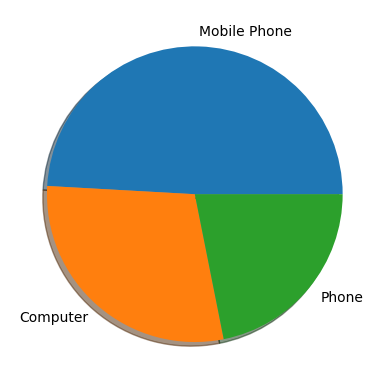

In [57]:
print(data['PreferredLoginDevice'].unique())
print()
preferred_login_device_counts = data['PreferredLoginDevice'].value_counts()
display(preferred_login_device_counts)

plt.pie(preferred_login_device_counts, labels=preferred_login_device_counts.index, shadow = True)

['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']



Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

([<matplotlib.patches.Wedge at 0x7f50a879e4d0>,
 [Text(0.30352884755367315, 1.0572938279885773, 'Debit Card'),
  Text(-1.0576318887537715, -0.3023487851656267, 'Credit Card'),
  Text(-0.12311729308892679, -1.0930883459915102, 'E wallet'),
  Text(0.4897950358081748, -0.984936963920874, 'UPI'),
  Text(0.8590296951723456, -0.6870720361156516, 'COD'),
  Text(1.0446343524366724, -0.344585359104554, 'CC'),
  Text(1.0962001431105366, -0.09135231931614618, 'Cash on Delivery')])

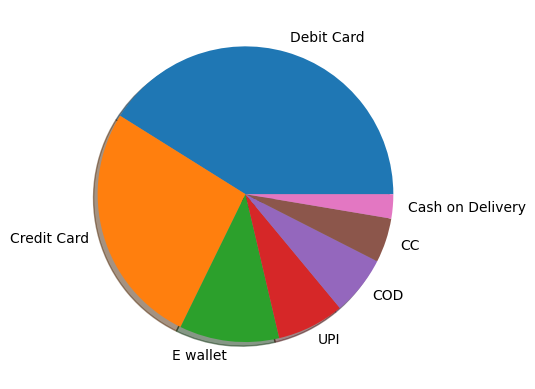

In [58]:
print(data['PreferredPaymentMode'].unique())
print()
preferred_payment_mode_counts = data['PreferredPaymentMode'].value_counts()
display(preferred_payment_mode_counts)

plt.pie(preferred_payment_mode_counts, labels=preferred_payment_mode_counts.index, shadow = True)

<Axes: >

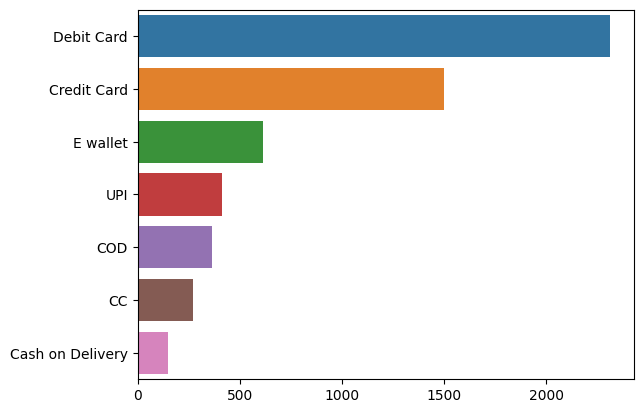

In [59]:
sns.barplot(y=preferred_payment_mode_counts.index, x=preferred_payment_mode_counts.values, orient='h')

[3 1 2]



1    3666
3    1722
2     242
Name: CityTier, dtype: int64

([<matplotlib.patches.Wedge at 0x7f50a89476d0>,
 [Text(-0.5029411309959537, 0.9782894350612763, '1'),
  Text(0.3666569951560525, -1.0370933650849063, '3'),
  Text(1.0899857752006596, -0.14809122141510278, '2')])

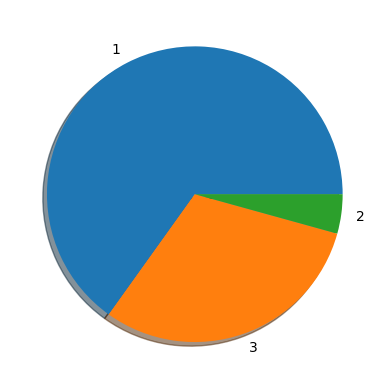

In [60]:
print(data['CityTier'].unique())
print()
citytier_counts = data['CityTier'].value_counts()
display(citytier_counts)

plt.pie(citytier_counts, labels=citytier_counts.index, shadow = True)

['Single' 'Divorced' 'Married']



Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

([<matplotlib.patches.Wedge at 0x7f50a95242b0>,
 [Text(-0.10480226990397129, 1.094996111510436, 'Married'),
  Text(-0.40573599303152996, -1.0224374327843824, 'Single'),
  Text(0.9791299402688339, -0.5013028626181479, 'Divorced')])

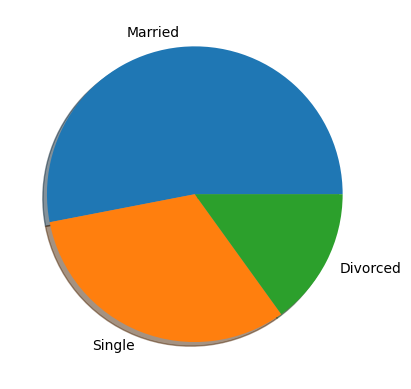

In [61]:
print(data['MaritalStatus'].unique())
print()
marital_status_counts = data['MaritalStatus'].value_counts()
display(marital_status_counts)

plt.pie(marital_status_counts, labels=marital_status_counts.index, shadow = True)

['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']



Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

([<matplotlib.patches.Wedge at 0x7f50a8612f50>,
 [Text(0.45543323658372376, 1.0012894521639955, 'Laptop & Accessory'),
  Text(-1.0885319635376964, 0.1584240018329513, 'Mobile Phone'),
  Text(-0.5704246196251949, -0.9405401391357266, 'Fashion'),
  Text(0.3948732099879938, -1.0266816196045285, 'Mobile'),
  Text(0.9527302262295387, -0.5498228042093308, 'Grocery'),
  Text(1.0880857158164847, -0.16146044418410396, 'Others')])

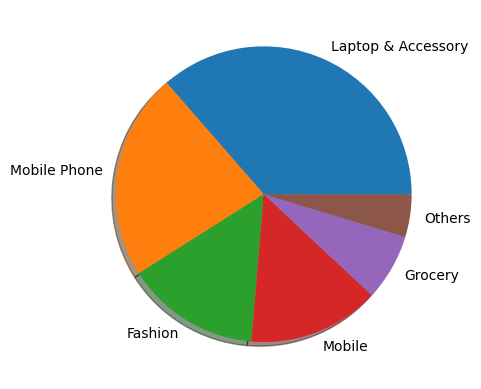

In [63]:
print(data['PreferedOrderCat'].unique())
print()
prefered_order_cat_counts = data['PreferedOrderCat'].value_counts()
display(prefered_order_cat_counts)

plt.pie(prefered_order_cat_counts, labels=prefered_order_cat_counts.index, shadow = True)

#### Summary of EDA and Data cleaning

The dataset has a total of 5630 entries consisting of 20 columns. The columns are as follows:

*   CustomerID
*   Churn
*   Tenure
*   PreferredLoginDevice
*   CityTier
*   WarehouseToHome
*   PreferredPaymentMode
*   Gender
*   HourSpendOnApp
*   NumberOfDeviceRegistered
*   PreferedOrderCat
*   SatisfactionScore
*   MaritalStatus
*   NumberOfAddress
*   Complain
*   OrderAmountHikeFromlastYear
*   CouponUsed
*   OrderCount
*   DaySinceLastOrder
*   CashbackAmount

Out of these columns, the following contained **numerical** data:

*   CustomerID
*   Churn
*   Tenure
*   CityTier
*   WarehouseToHome
*   HourSpendOnApp
*   NumberOfDeviceRegistered
*   SatisfactionScore
*   NumberOfAddress
*   Complain
*   OrderAmountHikeFromlastYear
*   CouponUsed
*   OrderCount
*   DaySinceLastOrder
*   CashbackAmount

and these contained **categorical** data:

*   PreferredLoginDevice
*   PreferredPaymentMode
*   Gender
*   PreferedOrderCat
*   MaritalStatus

In the '**PreferredPaymentMode**' column we see that there is significantly more values for Dedit Card, Credit Card and E wallet. So, we perform feature engineering on this column using .apply and reduce it to just the 4 values of ['Debit Card', 'Credit Card', 'E wallet', 'Other']

We also noticed null values in the following columns. Of these columns with null values, the ones that will be dropped are indicated as such.
*   Tenure ( dropped )
*   PreferredLoginDevice
*   WarehouseToHome   ( dropped )
*   HourSpendOnApp               ( dropped )
*   NumberOfDeviceRegistered       ( dropped )
*   OrderAmountHikeFromlastYear
*   CouponUsed
*   OrderCount
*   DaySinceLastOrder

### Feature Engineering

Based on the Exploratory Data Analysis and Data Cleaning performed, the **final list** of features are:

*   PreferredLoginDevice
*   CityTier
*   PreferredPaymentMode
*   Gender
*   PreferedOrderCat
*   SatisfactionScore
*   MaritalStatus
*   Complain
*   OrderAmountHikeFromlastYear
*   CouponUsed
*   OrderCount
*   DaySinceLastOrder
*   CashbackAmount

Description of the variable you plan to perform feature engineering on:\
Feature engineering will be performed on these 2 variables, *PreferredPaymentMode* and *PreferedOrderCat*

Description of the plan of your feature engineering process:\
I will use the pandas.DataFrame.apply() with a lambda function to the aforementioned columns

Rationale of your choice of feature:\
In the '**PreferredPaymentMode**' column we see that there is significantly more values for Dedit Card, Credit Card and E wallet. So, we perform feature engineering on this column using .apply and reduce it to just the 4 values of ['Debit Card', 'Credit Card', 'E wallet', 'Other']\
In the '**PreferedOrderCat**' column we see that there is significantly more values for Dedit Card, Credit Card and E wallet. So, we perform feature engineering on this column using .apply and reduce it to just the values of ['Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Other']


Plan for unit testing after introducing this feature:\
I plan to use pytest framework to perform unit tests

In [64]:
# Feature 1
# feature engineer column 'PreferredPaymentMode'
keep_methods = ['Debit Card', 'Credit Card', 'E wallet']
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].apply(lambda x: x if x in keep_methods else 'Other')
data.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
543,50544,0,1.0,Phone,1,NaN,Other,Female,3.0,3,Mobile,3,Married,6,0,18.0,2.0,2.0,2.0,124
95,50096,0,9.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,9,0,16.0,0.0,3.0,7.0,159
969,50970,0,13.0,Mobile Phone,3,15.0,Credit Card,Male,2.0,3,Laptop & Accessory,5,Married,1,0,12.0,2.0,7.0,1.0,155
3045,53046,0,1.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,18.0,3.0,8.0,8.0,178
4044,54045,1,20.0,Mobile Phone,1,31.0,Debit Card,Male,4.0,4,Mobile Phone,1,Single,3,0,17.0,1.0,2.0,1.0,151


In [65]:
# Feature 2
# feature engineer column 'PreferedOrderCat'
keep_methods = ['Laptop & Accessory', 'Mobile Phone', 'Fashion']
data['PreferedOrderCat'] = data['PreferedOrderCat'].apply(lambda x: x if x in keep_methods else 'Other')
data.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1270,51271,1,0.0,Computer,3,32.0,E wallet,Male,3.0,3,Laptop & Accessory,1,Married,2,1,11.0,0.0,1.0,8.0,156
1847,51848,0,26.0,Mobile Phone,3,6.0,Credit Card,Female,2.0,3,Laptop & Accessory,5,Single,8,0,20.0,4.0,8.0,10.0,184
1574,51575,1,0.0,Phone,1,NaN,Other,Male,2.0,4,Other,1,Single,2,1,13.0,0.0,1.0,1.0,124
381,50382,0,10.0,Mobile Phone,1,9.0,Other,Male,2.0,3,Fashion,3,Divorced,2,0,15.0,6.0,7.0,8.0,194
4727,54728,0,8.0,Mobile Phone,3,9.0,Other,Male,3.0,4,Laptop & Accessory,1,Single,3,0,23.0,1.0,2.0,5.0,188


### ML Pipeline


In [66]:
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Test-Train Split

In [67]:
class_column = ['Churn']
drop_columns = ['CustomerID','Churn','Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress']
random_seed = 1234

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=drop_columns), data[class_column],
                                                   test_size=0.30, random_state=random_seed, stratify=data[class_column])

In [68]:
# Check

# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (3941, 13)


,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1544,Mobile Phone,1,Other,Male,Laptop & Accessory,1,Married,0,18.0,0.0,1.0,7.0,163
3363,Mobile Phone,1,Other,Male,Mobile Phone,5,Single,1,12.0,1.0,2.0,3.0,153
695,Computer,3,E wallet,Male,Laptop & Accessory,2,Married,0,11.0,0.0,1.0,2.0,150
5188,Phone,1,Credit Card,Male,Mobile Phone,3,Married,1,13.0,1.0,2.0,4.0,146
3231,Computer,1,Debit Card,Female,Fashion,5,Divorced,0,15.0,1.0,NaN,6.0,242



On X test: 
X test dimensions:  (1689, 13)


,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1219,Phone,1,Credit Card,Male,Laptop & Accessory,5,Married,1,22.0,0.0,1.0,4.0,143
3167,Computer,2,Credit Card,Male,Other,4,Divorced,0,NaN,7.0,11.0,8.0,307
3027,Mobile Phone,1,Other,Male,Mobile Phone,2,Single,0,18.0,3.0,3.0,3.0,165
5566,Mobile Phone,1,Credit Card,Female,Laptop & Accessory,5,Single,1,20.0,1.0,2.0,5.0,169
1700,Mobile Phone,3,Debit Card,Male,Laptop & Accessory,3,Married,0,17.0,0.0,7.0,7.0,153


In [69]:
# X Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# X test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (3941, 1)


,Churn
1544,0
3363,0
695,0
5188,0
3231,0



On y test: 
y test dimensions:  (1689, 1)


,Churn
1219,0
3167,0
3027,0
5566,0
1700,0


In [70]:
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder())])

num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(strategy='mean')),
                               ('scale_num', StandardScaler())])

In [71]:
cat_cols = ['PreferredLoginDevice','PreferredPaymentMode','Gender', 'PreferedOrderCat','MaritalStatus']
num_cols = ['CityTier', 'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, cat_cols),
                             ('num_pipe', num_pipeline, num_cols)],
                             remainder='passthrough')

### Logistic Regression


In [72]:
# Logistic Regression
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['CityTier',
                                                   'SatisfactionScore',
                                                   'Complain',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

#### Cross-validation with hyperparameter tuning

In [73]:
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True, n_jobs=-1)

In [74]:
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('...
                                                                          'SatisfactionScore',
                                                                          'Complain',
                                                                          'OrderAmountHikeFromlastYear',
                                                                          'CouponUsed',
                                                                          'OrderCount',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             n_jobs=-1,
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [75]:
print(grid_search.best_score_)
grid_search.best_params_

0.8612009676194887


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 1.0}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077585,0.010087,0.015146,0.001707,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",0.868188,0.852792,0.862944,...,0.861201,0.006129,1,0.861675,0.863305,0.858865,0.858547,0.858230,0.860124,0.002009
1,0.099495,0.007294,0.013180,0.001238,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",0.863118,0.852792,0.860406,...,0.859679,0.005673,2,0.859772,0.862353,0.861402,0.858230,0.858547,0.860061,0.001599
2,0.135092,0.016944,0.012852,0.000459,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",0.863118,0.854061,0.856599,...,0.858157,0.006002,14,0.861675,0.860768,0.860450,0.857279,0.859816,0.859998,0.001486
3,0.120317,0.014588,0.013584,0.002478,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",0.863118,0.852792,0.857868,...,0.857903,0.006498,15,0.860723,0.860133,0.859816,0.856327,0.859182,0.859236,0.001537
4,0.102432,0.011062,0.012546,0.000922,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",0.860583,0.852792,0.859137,...,0.858157,0.006251,13,0.860406,0.860133,0.858547,0.856644,0.860133,0.859173,0.001425
5,0.083468,0.004507,0.012436,0.001290,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864385,0.851523,0.860406,...,0.859679,0.005145,3,0.858820,0.864891,0.862036,0.858547,0.856962,0.860251,0.002845
6,0.110184,0.014345,0.012644,0.001931,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864385,0.851523,0.860406,...,0.859679,0.005145,3,0.858503,0.865208,0.862036,0.857913,0.856962,0.860124,0.003067
7,0.098980,0.010304,0.011869,0.000260,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864385,0.851523,0.860406,...,0.859679,0.005145,3,0.858185,0.865208,0.862036,0.857913,0.856962,0.860061,0.003103
8,0.098071,0.006375,0.012817,0.001674,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864385,0.851523,0.860406,...,0.859679,0.005145,3,0.858820,0.864891,0.862036,0.858230,0.856962,0.860188,0.002886
9,0.126381,0.037809,0.015208,0.003641,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",0.864385,0.851523,0.860406,...,0.859679,0.005145,3,0.858503,0.865208,0.862036,0.857913,0.856962,0.860124,0.003067


In [76]:
grid_search.classes_

array([0, 1])

In [77]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test))) # prediction on test set

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1405
           1       0.70      0.20      0.32       284

    accuracy                           0.85      1689
   macro avg       0.78      0.59      0.62      1689
weighted avg       0.83      0.85      0.82      1689



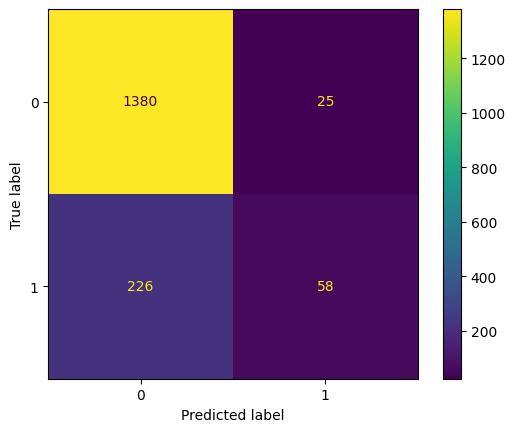

In [78]:
cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

### Decision Tree

In [79]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl',DecisionTreeClassifier(random_state=0))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['CityTier',
                                                   'SatisfactionScore',
                                                   'Complain',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('mdl', DecisionTreeClassifier(random_state=0))])

#### Cross-validation with hyperparameter tuning

In [80]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
#parameters = dict(mdl__criterion=criterion, mdl__max_depth=max_depth)
parameters = {
    'mdl__criterion': ['gini', 'entropy'],
    'mdl__max_depth': [2,4,6,8,10,12]
}

grid_search_cv = GridSearchCV(pipe, param_grid=parameters, cv=10, verbose=1, n_jobs=-1)

In [81]:
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[(...te_num',
                                                                                          SimpleImputer()),
                                                                                         ('scale_num',
                                                                                          StandardScaler())]),
                                                                         ['CityTier',
                                                                          'SatisfactionScore',
                                                                          'Complain',
                                                                          'OrderAmountHikeFromlastYear',
                                                                          'CouponUsed',
                                                                          'OrderCount',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])])),
                                       ('mdl',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'mdl__criterion': ['gini', 'entropy'],
                         'mdl__max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=1)

In [82]:
print(grid_search_cv.best_score_)
grid_search_cv.best_params_

0.9010447857096961


{'mdl__criterion': 'gini', 'mdl__max_depth': 12}

In [83]:
pd.DataFrame(grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__criterion,param_mdl__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062395,0.016269,0.025053,0.010993,gini,2,"{'mdl__criterion': 'gini', 'mdl__max_depth': 2}",0.827848,0.829949,0.814721,0.837563,0.837563,0.827411,0.842640,0.824873,0.827411,0.829949,0.829993,0.007429,11
1,0.083580,0.006007,0.032249,0.007448,gini,4,"{'mdl__criterion': 'gini', 'mdl__max_depth': 4}",0.850633,0.865482,0.850254,0.827411,0.865482,0.840102,0.865482,0.842640,0.840102,0.857868,0.850546,0.012405,9
2,0.091499,0.005101,0.028561,0.006469,gini,6,"{'mdl__criterion': 'gini', 'mdl__max_depth': 6}",0.853165,0.873096,0.862944,0.840102,0.880711,0.852792,0.870558,0.868020,0.873096,0.855330,0.862981,0.011764,7
3,0.089347,0.017993,0.033242,0.006690,gini,8,"{'mdl__criterion': 'gini', 'mdl__max_depth': 8}",0.873418,0.898477,0.862944,0.870558,0.895939,0.898477,0.875635,0.875635,0.875635,0.845178,0.877189,0.015972,5
4,0.080115,0.024304,0.021788,0.007567,gini,10,"{'mdl__criterion': 'gini', 'mdl__max_depth': 10}",0.888608,0.898477,0.873096,0.878173,0.908629,0.901015,0.893401,0.885787,0.893401,0.870558,0.889115,0.011742,3
5,0.052287,0.004521,0.014906,0.000618,gini,12,"{'mdl__criterion': 'gini', 'mdl__max_depth': 12}",0.883544,0.903553,0.903553,0.911168,0.911168,0.918782,0.918782,0.890863,0.890863,0.878173,0.901045,0.013724,1
6,0.037237,0.002471,0.014548,0.000788,entropy,2,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.827848,0.829949,0.814721,0.837563,0.837563,0.827411,0.832487,0.829949,0.827411,0.829949,0.829485,0.006078,12
7,0.040780,0.002362,0.014971,0.001483,entropy,4,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.840506,0.865482,0.840102,0.832487,0.860406,0.840102,0.850254,0.850254,0.840102,0.842640,0.846233,0.009753,10
8,0.046210,0.006036,0.014573,0.001383,entropy,6,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.850633,0.870558,0.865482,0.860406,0.873096,0.847716,0.857868,0.870558,0.875635,0.845178,0.861713,0.010501,8
9,0.046552,0.001677,0.014812,0.001481,entropy,8,"{'mdl__criterion': 'entropy', 'mdl__max_depth'...",0.858228,0.873096,0.878173,0.865482,0.883249,0.873096,0.852792,0.870558,0.868020,0.865482,0.868818,0.008528,6


In [84]:
print(classification_report(y_test, grid_search_cv.best_estimator_.predict(X_test))) # prediction on test set

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1405
           1       0.70      0.61      0.65       284

    accuracy                           0.89      1689
   macro avg       0.81      0.78      0.79      1689
weighted avg       0.89      0.89      0.89      1689



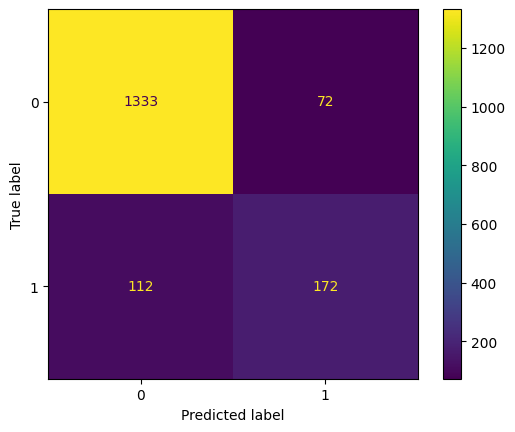

In [85]:
cm = confusion_matrix(y_test, grid_search_cv.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search_cv.classes_)
disp.plot()

plt.show()

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl',RandomForestClassifier(random_state=1234))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['CityTier',
                                                   'SatisfactionScore',
                                                   'Complain',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('mdl', RandomForestClassifier(random_state=1234))])

#### Cross-validation with hyperparameter tuning

In [87]:
params = [
  {'mdl__max_depth': [ 6, 8, 10, 12, 15, 20] },
]

grid_search_cv = GridSearchCV(pipe, param_grid=params, cv=10, verbose=1, n_jobs=-1)

In [88]:
grid_search_cv.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer()),
                                                                                         ('scale_num',
                                                                                          StandardScaler())]),
                                                                         ['CityTier',
                                                                          'SatisfactionScore',
                                                                          'Complain',
                                                                          'OrderAmountHikeFromlastYear',
                                                                          'CouponUsed',
                                                                          'OrderCount',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])])),
                                       ('mdl',
                                        RandomForestClassifier(random_state=1234))]),
             n_jobs=-1, param_grid=[{'mdl__max_depth': [6, 8, 10, 12, 15, 20]}],
             verbose=1)

In [89]:
print(grid_search_cv.best_score_)
grid_search_cv.best_params_

0.9243809034247894


{'mdl__max_depth': 20}

In [90]:
pd.DataFrame(grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.464752,0.017092,0.032812,0.000399,6,{'mdl__max_depth': 6},0.863291,0.868020,0.852792,0.840102,0.862944,0.852792,0.870558,0.860406,0.857868,0.847716,0.857649,0.008919,6
1,0.799021,0.240775,0.053234,0.014632,8,{'mdl__max_depth': 8},0.886076,0.880711,0.873096,0.857868,0.878173,0.873096,0.883249,0.880711,0.878173,0.862944,0.875410,0.008488,5
2,0.555434,0.008201,0.035342,0.001165,10,{'mdl__max_depth': 10},0.911392,0.898477,0.885787,0.883249,0.906091,0.880711,0.906091,0.906091,0.906091,0.885787,0.896977,0.011162,4
3,0.594008,0.014744,0.035978,0.001172,12,{'mdl__max_depth': 12},0.924051,0.911168,0.898477,0.901015,0.928934,0.893401,0.921320,0.931472,0.921320,0.903553,0.913471,0.012980,3
4,0.617837,0.013483,0.039825,0.005793,15,{'mdl__max_depth': 15},0.934177,0.916244,0.916244,0.921320,0.939086,0.901015,0.934010,0.928934,0.926396,0.913706,0.923113,0.011024,2
5,0.902956,0.308167,0.053443,0.020449,20,{'mdl__max_depth': 20},0.939241,0.921320,0.906091,0.923858,0.939086,0.908629,0.931472,0.934010,0.926396,0.913706,0.924381,0.011359,1


In [91]:
print(classification_report(y_test, grid_search_cv.best_estimator_.predict(X_test))) # prediction on test set

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1405
           1       0.95      0.52      0.67       284

    accuracy                           0.91      1689
   macro avg       0.93      0.76      0.81      1689
weighted avg       0.92      0.91      0.90      1689



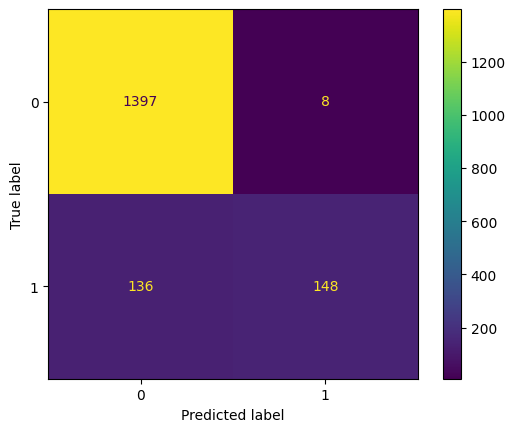

In [92]:
cm = confusion_matrix(y_test, grid_search_cv.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search_cv.classes_)
disp.plot()

plt.show()

### KNearest Neighbors

In [93]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl',KNeighborsClassifier(n_neighbors=5))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['CityTier',
                                                   'SatisfactionScore',
                                                   'Complain',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount'])])),
                ('mdl', KNeighborsClassifier())])

#### Cross-validation with hyperparameter tuning

In [94]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
params = dict(mdl__n_neighbors=n_neighbors,mdl__weights=weights,mdl__metric=metric)

grid_search_cv = GridSearchCV(pipe, param_grid=params, cv=10, verbose=1, n_jobs=-1)

In [95]:
grid_search_cv.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[(...
                                                                                          StandardScaler())]),
                                                                         ['CityTier',
                                                                          'SatisfactionScore',
                                                                          'Complain',
                                                                          'OrderAmountHikeFromlastYear',
                                                                          'CouponUsed',
                                                                          'OrderCount',
                                                                          'DaySinceLastOrder',
                                                                          'CashbackAmount'])])),
                                       ('mdl', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'mdl__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'mdl__n_neighbors': range(1, 21, 2),
                         'mdl__weights': ['uniform', 'distance']},
             verbose=1)

In [96]:
print(grid_search_cv.best_score_)
grid_search_cv.best_params_

0.9347818543982523


{'mdl__metric': 'manhattan', 'mdl__n_neighbors': 1, 'mdl__weights': 'uniform'}

In [99]:
pd.DataFrame(grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__metric,param_mdl__n_neighbors,param_mdl__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032537,0.002204,0.049667,0.012030,euclidean,1,uniform,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.956962,0.936548,...,0.923858,0.936548,0.913706,0.926396,0.928934,0.918782,0.918782,0.928437,0.011811,3
1,0.031809,0.002576,0.026105,0.002534,euclidean,1,distance,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.956962,0.936548,...,0.923858,0.936548,0.913706,0.926396,0.928934,0.918782,0.918782,0.928437,0.011811,3
2,0.042767,0.022561,0.062507,0.033921,euclidean,3,uniform,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.913924,0.885787,...,0.888325,0.901015,0.880711,0.885787,0.888325,0.852792,0.875635,0.886316,0.015090,35
3,0.049855,0.020068,0.034259,0.014515,euclidean,3,distance,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.939241,0.906091,...,0.921320,0.926396,0.908629,0.916244,0.916244,0.893401,0.903553,0.914736,0.012161,10
4,0.031383,0.003030,0.040773,0.005232,euclidean,5,uniform,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.888608,0.878173,...,0.890863,0.893401,0.855330,0.890863,0.890863,0.855330,0.865482,0.878455,0.014263,38
5,0.032132,0.004222,0.025586,0.002278,euclidean,5,distance,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.934177,0.911168,...,0.923858,0.921320,0.893401,0.923858,0.918782,0.901015,0.898477,0.912707,0.012929,13
6,0.031358,0.003896,0.039824,0.002754,euclidean,7,uniform,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.886076,0.865482,...,0.873096,0.873096,0.855330,0.883249,0.873096,0.852792,0.860406,0.868303,0.010723,40
7,0.031500,0.001901,0.026571,0.002501,euclidean,7,distance,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.918987,0.901015,...,0.916244,0.916244,0.888325,0.906091,0.911168,0.903553,0.893401,0.903574,0.012198,17
8,0.031055,0.001637,0.043429,0.002022,euclidean,9,uniform,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.873418,0.870558,...,0.862944,0.865482,0.860406,0.880711,0.873096,0.840102,0.847716,0.863992,0.011612,46
9,0.030309,0.000700,0.027899,0.005569,euclidean,9,distance,"{'mdl__metric': 'euclidean', 'mdl__n_neighbors...",0.916456,0.901015,...,0.908629,0.903553,0.885787,0.906091,0.903553,0.901015,0.883249,0.899767,0.010139,21


In [100]:
print(classification_report(y_test, grid_search_cv.best_estimator_.predict(X_test))) # prediction on test set

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1405
           1       0.80      0.75      0.78       284

    accuracy                           0.93      1689
   macro avg       0.88      0.86      0.87      1689
weighted avg       0.93      0.93      0.93      1689



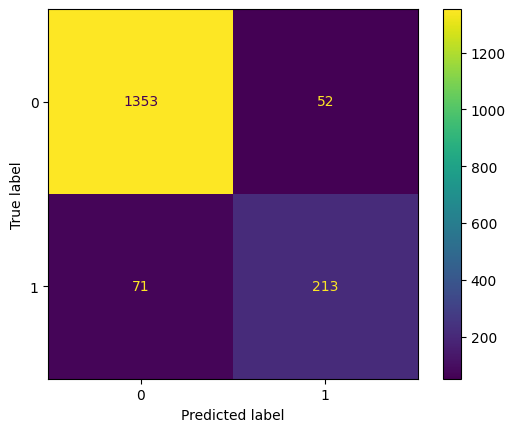

In [101]:
cm = confusion_matrix(y_test, grid_search_cv.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search_cv.classes_)
disp.plot()

plt.show()

## Model Comparison

The **f1-score** macro avg for the models are:


| Model | macro avg|
|-------|----------|
|Logistic Regression|0.61|
|Decision Tree|0.81|
|Random Forest|0.81|
|KNearest Neighbors|0.87| *italicized text*

Based on the data above, the model with the best performance is the KNearest Neighbors.

### Model Performance
I ran the entire pipleline 3 times. The first time with feature engineering on feature1, the second time with feature engineering on feature2 and then the third time combining feature1 and feature2. The f1-scores are listed below.

The **f1-score** macro avg for the models using feature1(*PreferredPaymentMode*) are:


| Model | macro avg|
|-------|----------|
|Logistic Regression|0.61|
|Decision Tree|0.81|
|Random Forest|0.81|
|KNearest Neighbors|0.87|


The **f1-score** macro avg for the models using feature2(*PreferedOrderCat*) are:


| Model | macro avg|
|-------|----------|
|Logistic Regression|0.60|
|Decision Tree|0.79|
|Random Forest|0.82|
|KNearest Neighbors|0.87|

The **f1-score** macro avg for the models when combining both features (*PreferredPaymentMode* and *PreferedOrderCat*) are:


| Model | macro avg|
|-------|----------|
|Logistic Regression|0.62|
|Decision Tree|0.79|
|Random Forest|0.81|
|KNearest Neighbors|0.87|

Based on the data above, the model with the best performance is the KNearest Neighbors.

## References ##

[Gorgias CX Growth Playbook](https://www.gorgias.com/guides/cx-growth-playbook)

[Chargebee - eCommerce Churn Rate](https://www.chargebee.com/blog/ecommerce-churn-rate/)

[Shopify - Churn Rate in eCommerce](https://www.shopify.com/blog/churn-rate-in-ecommerce)

[GainSight - Guide to Churn](https://www.gainsight.com/guides/the-essential-guide-to-churn/)


[Oracle - Challenges of building a predictive churn model](https://blogs.oracle.com/ai-and-datascience/post/the-challenges-of-building-a-predictive-churn-model)
